In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df_test=pd.read_csv('C:/Users/prade/Desktop/imarticus files/DATASETS/BigMart Sales/Test.csv')

In [3]:
df_train=pd.read_csv('C:/Users/prade/Desktop/imarticus files/DATASETS/BigMart Sales/Train.csv')

In [4]:
df_test.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [5]:
df_train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


### Categorical features:
#Item_Identifier

#Item_Fat_Content

#Item_Type

#Outlet_Identifier

#Outlet_Size

#Outlet_Location_Type

#Outlet_Type

In [6]:
df_train.shape

(8523, 12)

In [7]:
df_test.shape

(5681, 11)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [10]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:>

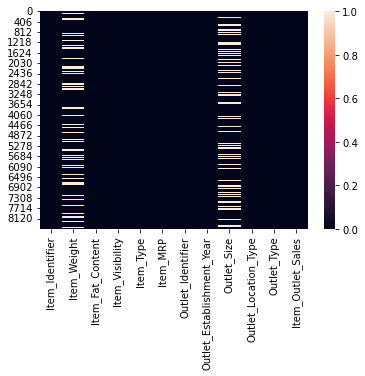

In [11]:
sns.heatmap(df_train.isna())

In [12]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

<AxesSubplot:>

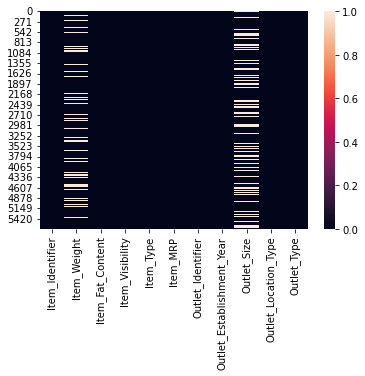

In [13]:
sns.heatmap(df_test.isna())

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [15]:
df_train['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [16]:
## Item_Fat_Content column
df_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [17]:
df_test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [18]:
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace(['LF','reg'],['Low Fat','Regular'])

In [19]:
df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].replace(['LF','reg'],['Low Fat','Regular'])

In [20]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    3006
low fat     112
Name: Item_Fat_Content, dtype: int64

In [21]:
df_test['Item_Fat_Content'].value_counts()

Low Fat    3602
Regular    2013
low fat      66
Name: Item_Fat_Content, dtype: int64

In [22]:
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace(['low fat'],['Low Fat'])

In [23]:
df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].replace(['low fat'],['Low Fat'])

In [24]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [25]:
df_test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [26]:
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace(['Low Fat','Regular'],[1,0])

In [27]:
df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].replace(['Low Fat','Regular'],[1,0])

In [28]:
df_train['Item_Fat_Content'].value_counts()

1    5517
0    3006
Name: Item_Fat_Content, dtype: int64

In [29]:
df_test['Item_Fat_Content'].value_counts()

1    3668
0    2013
Name: Item_Fat_Content, dtype: int64

In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 799.2+ KB


In [31]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   int64  
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 488.3+ KB


In [32]:
df_train.shape

(8523, 12)

In [33]:
df_test.shape

(5681, 11)

In [34]:
df_train.shape

(8523, 12)

## replacing missing values in ''Item_Weight'' column

In [35]:
df_train['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [36]:
df_test['Item_Weight'].value_counts()

10.500    57
17.600    53
15.600    48
20.250    47
19.350    46
          ..
6.980      1
6.320      1
5.465      1
5.945      1
7.670      1
Name: Item_Weight, Length: 410, dtype: int64

In [37]:
df_train['Item_Weight'].mean()

12.857645184136183

In [38]:
df_test['Item_Weight'].mean()

12.695633368756374

In [39]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)

In [40]:
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)

In [41]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [42]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [43]:
df_train['Item_Weight'].value_counts()

12.857645    1463
12.150000      86
17.600000      82
13.650000      77
11.800000      76
             ... 
7.275000        2
7.685000        1
9.420000        1
6.520000        1
5.400000        1
Name: Item_Weight, Length: 416, dtype: int64

In [44]:
df_test['Item_Weight'].value_counts()

12.695633    976
10.500000     57
17.600000     53
15.600000     48
20.250000     47
            ... 
6.980000       1
6.320000       1
5.465000       1
5.945000       1
7.670000       1
Name: Item_Weight, Length: 411, dtype: int64

In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 799.2+ KB


In [46]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   int64  
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 488.3+ KB


## replacing missing values in 'Outlet_Size'

In [47]:
df_train['Outlet_Size'].isnull().sum()

2410

In [48]:
df_test['Outlet_Size'].isnull().sum()

1606

In [51]:
df_train.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,1,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,0,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,1,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,0,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,1,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,0,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,0,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,1,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,0,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,0,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [52]:
df_test.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,1,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,0,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600000,1,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315000,1,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,12.695633,0,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800000,0,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350000,0,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,12.695633,1,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305000,0,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985000,1,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [53]:
df_train['Outlet_Size']= df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0])
df_test['Outlet_Size']= df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0])

In [56]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,0,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,1,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,0,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [57]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,1,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,0,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,1,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,1,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,0,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [59]:
df_train['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [60]:
df_test['Outlet_Size'].value_counts()

Medium    3468
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [62]:
df_train['Outlet_Size'].isnull().sum()

0

In [63]:
df_test['Outlet_Size'].isnull().sum()

0

In [64]:
df_train['Outlet_Size']=df_train['Outlet_Size'].replace(['Small','Medium','High'],[0,1,2])

In [65]:
df_test['Outlet_Size']=df_test['Outlet_Size'].replace(['Small','Medium','High'],[0,1,2])

In [66]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 799.2+ KB


In [67]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   int64  
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   int64  
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 488.3+ KB


In [68]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,Dairy,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,0,0.019278,Soft Drinks,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,1,0.016760,Meat,141.6180,OUT049,1999,1,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,0,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,2,Tier 3,Supermarket Type1,994.7052


In [69]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,1,0.007565,Snack Foods,107.8622,OUT049,1999,1,Tier 1,Supermarket Type1
1,FDW14,8.300000,0,0.038428,Dairy,87.3198,OUT017,2007,1,Tier 2,Supermarket Type1
2,NCN55,14.600000,1,0.099575,Others,241.7538,OUT010,1998,1,Tier 3,Grocery Store
3,FDQ58,7.315000,1,0.015388,Snack Foods,155.0340,OUT017,2007,1,Tier 2,Supermarket Type1
4,FDY38,12.695633,0,0.118599,Dairy,234.2300,OUT027,1985,1,Tier 3,Supermarket Type3


## handling values in 'Outlet_Location_Type'

In [70]:
df_train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [71]:
df_test['Outlet_Location_Type'].value_counts()

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64

In [72]:
df_train['Outlet_Location_Type']=df_train['Outlet_Location_Type'].replace(['Tier 3','Tier 2','Tier 1'],[0,1,2])

In [74]:
df_test['Outlet_Location_Type']=df_test['Outlet_Location_Type'].replace(['Tier 3','Tier 2','Tier 1'],[0,1,2])

In [75]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,Dairy,249.8092,OUT049,1999,1,2,Supermarket Type1,3735.1380
1,DRC01,5.92,0,0.019278,Soft Drinks,48.2692,OUT018,2009,1,0,Supermarket Type2,443.4228
2,FDN15,17.50,1,0.016760,Meat,141.6180,OUT049,1999,1,2,Supermarket Type1,2097.2700
3,FDX07,19.20,0,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,0,Grocery Store,732.3800
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,2,0,Supermarket Type1,994.7052


In [76]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,1,0.007565,Snack Foods,107.8622,OUT049,1999,1,2,Supermarket Type1
1,FDW14,8.300000,0,0.038428,Dairy,87.3198,OUT017,2007,1,1,Supermarket Type1
2,NCN55,14.600000,1,0.099575,Others,241.7538,OUT010,1998,1,0,Grocery Store
3,FDQ58,7.315000,1,0.015388,Snack Foods,155.0340,OUT017,2007,1,1,Supermarket Type1
4,FDY38,12.695633,0,0.118599,Dairy,234.2300,OUT027,1985,1,0,Supermarket Type3


In [77]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 799.2+ KB


### handling values in 'Outlet_Type'

In [81]:
df_train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [79]:
df_test['Outlet_Type'].value_counts()

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64

In [82]:
df_train['Outlet_Type']=df_train['Outlet_Type'].replace(['Grocery Store','Supermarket Type3','Supermarket Type2','Supermarket Type1'],[0,1,2,3])

In [83]:
df_test['Outlet_Type']=df_test['Outlet_Type'].replace(['Grocery Store','Supermarket Type3','Supermarket Type2','Supermarket Type1'],[0,1,2,3])

In [84]:
df_train['Outlet_Type'].value_counts()

3    5577
0    1083
1     935
2     928
Name: Outlet_Type, dtype: int64

In [85]:
df_test['Outlet_Type'].value_counts()

3    3717
0     722
1     624
2     618
Name: Outlet_Type, dtype: int64

In [88]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,Dairy,249.8092,OUT049,1999,1,2,3,3735.1380
1,DRC01,5.92,0,0.019278,Soft Drinks,48.2692,OUT018,2009,1,0,2,443.4228
2,FDN15,17.50,1,0.016760,Meat,141.6180,OUT049,1999,1,2,3,2097.2700
3,FDX07,19.20,0,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,0,0,732.3800
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,2,0,3,994.7052


In [89]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,1,0.007565,Snack Foods,107.8622,OUT049,1999,1,2,3
1,FDW14,8.300000,0,0.038428,Dairy,87.3198,OUT017,2007,1,1,3
2,NCN55,14.600000,1,0.099575,Others,241.7538,OUT010,1998,1,0,0
3,FDQ58,7.315000,1,0.015388,Snack Foods,155.0340,OUT017,2007,1,1,3
4,FDY38,12.695633,0,0.118599,Dairy,234.2300,OUT027,1985,1,0,1


### Label encoding

In [100]:
encoder=LabelEncoder()

In [101]:
df_train['Item_Identifier']=encoder.fit_transform(df_train['Item_Identifier'])
df_train['Item_Type']=encoder.fit_transform(df_train['Item_Type'])
df_train['Outlet_Identifier']=encoder.fit_transform(df_train['Outlet_Identifier'])

In [102]:
df_test['Item_Identifier']=encoder.fit_transform(df_test['Item_Identifier'])
df_test['Item_Type']=encoder.fit_transform(df_test['Item_Type'])
df_test['Outlet_Identifier']=encoder.fit_transform(df_test['Outlet_Identifier'])

In [103]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,2,3,3735.1380
1,8,5.92,0,0.019278,14,48.2692,3,2009,1,0,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,2,3,2097.2700
3,1121,19.20,0,0.000000,6,182.0950,0,1998,1,0,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,2,0,3,994.7052


In [104]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,2,3
1,1067,8.300000,0,0.038428,4,87.3198,2,2007,1,1,3
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,1,0,0
3,809,7.315000,1,0.015388,13,155.0340,2,2007,1,1,3
4,1184,12.695633,0,0.118599,4,234.2300,5,1985,1,0,1


### splitting features and Target variables

In [107]:
x=df_train.drop(['Item_Outlet_Sales'],axis=1)
y=df_train['Item_Outlet_Sales']

In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=200)

In [110]:
print(x.shape,x_train.shape,x_test.shape)

(8523, 11) (5113, 11) (3410, 11)


In [111]:
print(y.shape,y_train.shape,y_test.shape)

(8523,) (5113,) (3410,)


### Machine learning model

## 1.XGBRegressor

In [146]:
regressor=XGBRegressor()

In [147]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [148]:
### Predicting training data
y_preds=regressor.predict(x_train)

In [149]:
### R_2 value
r_2_train = metrics.r2_score(y_train, y_preds)

In [150]:
print('R squared value:',r_2_train)

R squared value: 0.8896158352516684


In [151]:
### predicting on testing data
y_test_preds=regressor.predict(x_test)

In [152]:
### R_2 value
r_2_test = metrics.r2_score(y_test, y_test_preds)

In [153]:
print('R squared value:',r_2_test)

R squared value: 0.5232158921210683


## 2.Linear regression

In [171]:
LR = LinearRegression(normalize=True)
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)
y_pred_train=LR.predict(x_train)

In [172]:
R2_test = r2_score(y_test,y_pred)
R2_test

0.48598775576154374

In [173]:
R2_train = r2_score(y_train,y_pred_train)
R2_train

0.48031220164348887

In [174]:
MAE= metrics.mean_absolute_error(y_test,y_pred)
MSE= metrics.mean_squared_error(y_test,y_pred)

In [175]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 913.6282806491314
mean squared error: 1504409.5124188643


In [176]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 1226.5437262563712
